In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

import dataset
import model
import utils
import pretreat
%matplotlib inline

In [2]:
PATH = '/apl/kaggle/baidu_drive/data/'
device='cuda'
img = utils.imread(PATH + 'image/train/ID_8a6e65317' + '.jpg')
IMG_SHAPE = img.shape

In [3]:
test_images_dir = os.path.join(PATH, 'image/test/{}.jpg')
test_csv = pd.read_csv(os.path.join(PATH, 'sample_submission.csv'))
df_test = test_csv
test_dataset = dataset.CarDataset(df_test, test_images_dir)
print(len(test_dataset))

2021


In [4]:
history = pd.read_csv('history.csv')

In [5]:
history.head()

,Unnamed: 0,train_loss,dev_loss,mask_loss,regr_loss
0,0.000000,10384.192383,44.325722,44.325722,2.512155
1,0.000237,9014.305664,NaN,NaN,NaN
2,0.000474,6448.910156,NaN,NaN,NaN
3,0.000711,6973.173828,NaN,NaN,NaN
4,0.000948,6321.269531,NaN,NaN,NaN


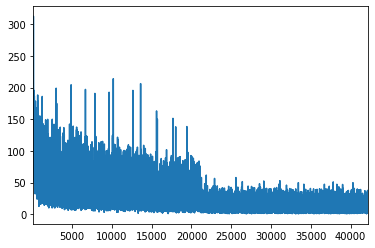

In [6]:
history['train_loss'].iloc[100:].plot();

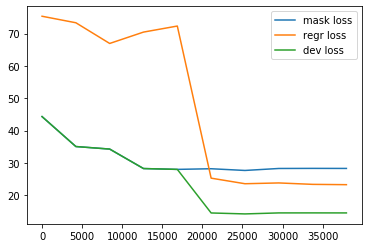

In [7]:
series1 = history.dropna()['mask_loss']
plt.plot(series1.index, series1 ,label = 'mask loss');
series2 = history.dropna()['regr_loss']
plt.plot(series2.index, 30*series2,label = 'regr loss');
series3 = history.dropna()['dev_loss']
plt.plot(series3.index, series3,label = 'dev loss');
plt.legend()
plt.show()

In [8]:
my_model = model.CentResnet(8).to(device)
my_model.load_state_dict(torch.load('model/epoch10.pth'))
my_model.eval()

CentResnet(
  (base_model): ResNetFeatures(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): GroupNorm(16, 64, eps=1e-05, affine=True)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): GroupNorm(16, 64, eps=1e-05, affine=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): GroupNorm(16, 64, eps=1e-05, affine=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): GroupNorm(16, 64, eps=1e-05, affine=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): GroupNorm(16, 64, eps=1e-05, affine=True)
      )
    )
    (layer2): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2

In [9]:
predictions = []

test_loader = DataLoader(dataset=test_dataset, batch_size=4, shuffle=False, num_workers=0)

for img, _, _ in test_loader:
    with torch.no_grad():
        output = my_model(img.to(device))
    output = output.data.cpu().numpy()
    for out in output:
        coords = utils.extract_coords(out)
        s = utils.coords2str(coords)
        predictions.append(s)

In [17]:
test_data = pd.read_csv('/apl/kaggle/baidu_drive/data/sample_submission.csv')
test_data['PredictionString'] = predictions
test_data.to_csv('predictions.csv', index = False)
test_data.tail()

,ImageId,PredictionString
2016,ID_a36374d4f,0.13721359 -0.006012773980303384 -3.0826603678...
2017,ID_998f76276,0.13811335 -3.00007403725071 -3.11790097144479...
2018,ID_427dfeea1,0.1572639 0.00840357123452972 -3.0799964835220...
2019,ID_94b297779,
2020,ID_53514d85d,0.14806956 -0.025235718648960747 -3.0967930016...
